In [1]:
import numpy as np
import os
import sys


In [2]:
sys.path.append('/home/caffe-user/caffe/python/')


In [3]:
import caffe


In [4]:
caffe.set_mode_gpu()


In [5]:
import matplotlib.image as img
import matplotlib.pyplot as plt
%matplotlib inline


In [6]:
from scipy import signal

In [7]:
net = caffe.Net('/home/caffe-user/caffe/models/bvlc_reference_caffenet/deploy.prototxt', '/home/caffe-user/caffe/models/bvlc_reference_caffenet/bvlc_reference_caffenet.caffemodel', caffe.TEST)


In [8]:
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})


In [9]:
# This is from our current code which uses ILSVRC_2012 image set for training
# The PlacesNet image set is different
trans_model = np.load('/home/caffe-user/caffe/python/caffe/imagenet/ilsvrc_2012_mean.npy')


In [10]:
# the mean of any dataset composed of natural images should be close to [104, 117, 123].
# My guess for greyscale is 115 ... 
trans_model.mean(1).mean(1)



array([ 104.00698793,  116.66876762,  122.67891434])

In [11]:
transformer.set_transpose('data', (2, 0, 1))
# Values from BlobProto notebook from places205CNN_mean.binaryproto
transformer.set_mean('data', trans_model.mean(1).mean(1))
transformer.set_raw_scale('data', 255)
transformer.set_channel_swap('data', (2, 1, 0))


In [12]:
def myTestFiles():
    file_list = []
    with open('/downloads/kenglish/data/protest_concert/files.lst', 'r') as f:
        for line in f:
            fpath = line.rstrip()
            file_list.append(fpath)
    return file_list

In [13]:
# NOTE:  I had to delete corrupted files from the file list
files = myTestFiles()
net.blobs['data'].reshape(len(files), 3, 227, 227)
i = 0
for fpath in files:
    net.blobs['data'].data[i] = transformer.preprocess('data', caffe.io.load_image(fpath))
    i += 1


In [14]:
net.forward()

{'prob': array([[  2.96074109e-06,   1.05774234e-05,   1.10066867e-05, ...,
           1.86541479e-06,   9.31652976e-05,   1.10132733e-05],
        [  2.31958765e-07,   5.96108111e-06,   8.71833799e-06, ...,
           2.25066628e-06,   4.03781160e-05,   3.67437224e-06],
        [  1.48275910e-06,   1.07829874e-04,   4.29514557e-06, ...,
           1.02066115e-05,   3.94420727e-04,   5.48260141e-05],
        ..., 
        [  7.33461434e-08,   2.29140915e-06,   8.76468278e-07, ...,
           3.32213006e-07,   2.56489602e-05,   6.61659487e-06],
        [  9.34105415e-08,   5.09251151e-07,   6.98679372e-08, ...,
           4.79063829e-08,   5.71175178e-06,   7.25702932e-07],
        [  2.46839761e-07,   1.81030136e-05,   2.67839846e-06, ...,
           3.18771924e-07,   2.82288529e-04,   1.87977330e-05]], dtype=float32)}

In [15]:
net.blobs.keys()

['data',
 'conv1',
 'pool1',
 'norm1',
 'conv2',
 'pool2',
 'norm2',
 'conv3',
 'conv4',
 'conv5',
 'pool5',
 'fc6',
 'fc7',
 'fc8',
 'prob']

In [16]:
net.blobs['prob'].data[0].shape

(1000,)

In [17]:
min(net.blobs['prob'].data[0].flatten()) , max(net.blobs['prob'].data[0].flatten())

(8.220983e-08, 0.4723458)

In [26]:
net.blobs['prob'].data[0].tolist().index(max(net.blobs['prob'].data[0]))

645

In [29]:
prob_0_list = net.blobs['prob'].data[0].tolist()
prod_0_sorted = sorted(prob_0_list, reverse=True)
prod_0_sorted[0:5]

[0.4723457992076874,
 0.0640752986073494,
 0.05906721204519272,
 0.039067622274160385,
 0.019211433827877045]

In [19]:
# Values in the probs output vector add to 1.0
sum(net.blobs['prob'].data[2])

1.0000000613196249

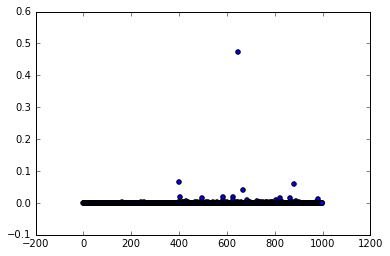

In [34]:
# Output vector of first image
scatter_x = range(1000)
scatter_y = [ net.blobs['prob'].data[0][i]  for i in scatter_x]
plt.scatter(scatter_x, scatter_y)
plt.show()

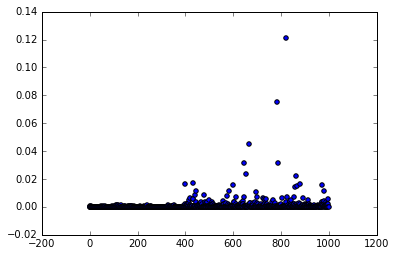

In [36]:
# Average vector of daytime concert cluster
ave_DC = sum(net.blobs['prob'].data[0:51])/50.0
scatter_x = range(1000)
scatter_y = [ave_DC[i]  for i in scatter_x]
plt.scatter(scatter_x, scatter_y)
plt.show()

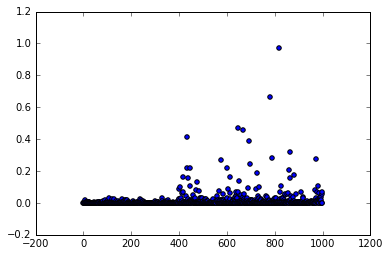

In [37]:
# Maxes of daytime concert cluster
max_DC = [ max([ net.blobs['prob'].data[i][j] for i in range(51) ]) for j in range(1000) ] 
scatter_x = range(1000)
scatter_y = [max_DC[i]  for i in scatter_x]
plt.scatter(scatter_x, scatter_y)
plt.show()

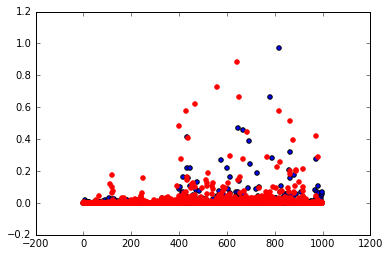

In [39]:
# Maxes of daytime concert cluster
max_DC = [ max([ net.blobs['prob'].data[i][j] for i in range(51) ]) for j in range(1000) ] 
scatter_x = range(1000)
scatter_y = [max_DC[i]  for i in scatter_x]
plt.scatter(scatter_x, scatter_y)
# Maxes of daytime protest cluster
max_NC = [ max([ net.blobs['prob'].data[i][j] for i in range(51, 100) ]) for j in range(1000) ] 
scatter_x = range(1000)
scatter_y = [max_NC[i]  for i in scatter_x]
plt.scatter(scatter_x, scatter_y, color='red')
plt.show()

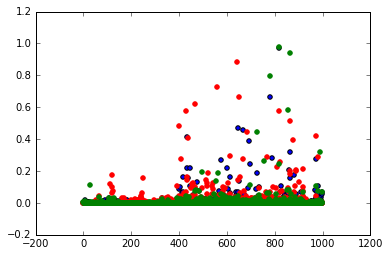

In [41]:
# Maxes of daytime concert cluster
max_DC = [ max([ net.blobs['prob'].data[i][j] for i in range(51) ]) for j in range(1000) ] 
scatter_x = range(1000)
scatter_y = [max_DC[i]  for i in scatter_x]
plt.scatter(scatter_x, scatter_y)
# Maxes of daytime protest concert cluster
max_DP = [ max([ net.blobs['prob'].data[i][j] for i in range(51, 100) ]) for j in range(1000) ] 
scatter_x = range(1000)
scatter_y = [max_DP[i]  for i in scatter_x]
plt.scatter(scatter_x, scatter_y, color='red')
# Maxes of nighttime concert cluster
max_NC = [ max([ net.blobs['prob'].data[i][j] for i in range(100, 150) ]) for j in range(1000) ] 
scatter_x = range(1000)
scatter_y = [max_NC[i]  for i in scatter_x]
plt.scatter(scatter_x, scatter_y, color='green')
plt.show()

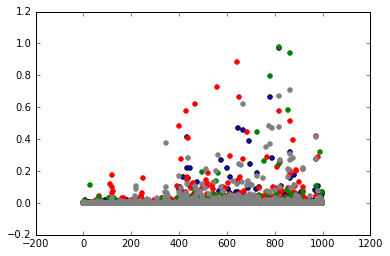

In [42]:
# Maxes of daytime concert cluster
max_DC = [ max([ net.blobs['prob'].data[i][j] for i in range(51) ]) for j in range(1000) ] 
scatter_x = range(1000)
scatter_y = [max_DC[i]  for i in scatter_x]
plt.scatter(scatter_x, scatter_y)
# Maxes of daytime protest concert cluster
max_DP = [ max([ net.blobs['prob'].data[i][j] for i in range(51, 100) ]) for j in range(1000) ] 
scatter_x = range(1000)
scatter_y = [max_DP[i]  for i in scatter_x]
plt.scatter(scatter_x, scatter_y, color='red')
# Maxes of nighttime concert cluster
max_NC = [ max([ net.blobs['prob'].data[i][j] for i in range(100, 150) ]) for j in range(1000) ] 
scatter_x = range(1000)
scatter_y = [max_NC[i]  for i in scatter_x]
plt.scatter(scatter_x, scatter_y, color='green')
# Maxes of nighttime concert cluster
max_NP = [ max([ net.blobs['prob'].data[i][j] for i in range(150, 197) ]) for j in range(1000) ] 
scatter_x = range(1000)
scatter_y = [max_NP[i]  for i in scatter_x]
plt.scatter(scatter_x, scatter_y, color='gray')
plt.show()

In [43]:
[ np.dot(net.blobs['prob'].data[0],max_DC), np.dot(net.blobs['prob'].data[0],max_DP), np.dot(net.blobs['prob'].data[0],max_NC), np.dot(net.blobs['prob'].data[0],max_NP) ]

[0.28586233, 0.15587947, 0.03725801, 0.087485425]

In [47]:
tags = ["day_concert", "day_protest", "night_concert", "night_protest"]
def getTag(imageNum):
    tag = ""
    if imageNum < 51:
        tag = tags[0]
    elif imageNum < 100:
        tag = tags[1]
    elif imageNum < 150:
        tag = tags[2]
    else:
        tag = tags[3]
    return tag


In [51]:
for i in range(197):
    A = [ np.dot(net.blobs['prob'].data[i],max_DC), np.dot(net.blobs['prob'].data[i],max_DP), np.dot(net.blobs['prob'].data[i],max_NC), np.dot(net.blobs['prob'].data[i],max_NP) ]    
    B = [ (A[j], j) for j in range(4) ]
    B.sort(reverse=True)
    tup = B[0]
    print str(i) + '\t' + getTag(i) + '\t' + tags[tup[1]] + '\t' + files[i]

0	day_concert	day_concert	/downloads/kenglish/data/protest_concert/day_concert/images (21).jpg
1	day_concert	day_concert	/downloads/kenglish/data/protest_concert/day_concert/Verizon-Wireless-Amphitheater-Irvine.jpg
2	day_concert	day_concert	/downloads/kenglish/data/protest_concert/day_concert/images.jpg
3	day_concert	day_concert	/downloads/kenglish/data/protest_concert/day_concert/images (2).jpg
4	day_concert	day_concert	/downloads/kenglish/data/protest_concert/day_concert/images (22).jpg
5	day_concert	night_concert	/downloads/kenglish/data/protest_concert/day_concert/images (15).jpg
6	day_concert	night_concert	/downloads/kenglish/data/protest_concert/day_concert/NMDConcert_Capitol_3.jpg
7	day_concert	day_concert	/downloads/kenglish/data/protest_concert/day_concert/149314031.jpg
8	day_concert	day_concert	/downloads/kenglish/data/protest_concert/day_concert/2011_may-day_13038584088229.png
9	day_concert	day_concert	/downloads/kenglish/data/protest_concert/day_concert/danielle-bradbery-se

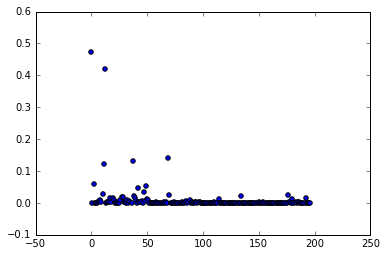

In [33]:
# Image 0 has most of its probability in bucket 645 ("n03733131 maypole")
# Plot output bucket 645 probability (y-axis) for each picture (x-axis)
# We see there is one other picture that also aligned with "maypole"
scatter_x = range(len(net.blobs['prob'].data))
scatter_y = [ net.blobs['prob'].data[i][645]  for i in scatter_x]
plt.scatter(scatter_x, scatter_y)
plt.show()

In [20]:
np.dot(net.blobs['prob'].data[0],net.blobs['prob'].data[1])

0.011074974

In [21]:
def dist(V, W, scale):
    D = (W.flatten() - V.flatten()) / scale
    return np.dot(D, D)/np.prod(V.shape)

In [23]:
dist(net.blobs['prob'].data[0],net.blobs['prob'].data[1], (1000))

8.5692488482891353e-10

In [24]:
dist(net.blobs['prob'].data[0],net.blobs['prob'].data[190], (1000))

7.4589900123100964e-10

In [26]:
imageId_by_tag = {}
for i in range(len(net.blobs['prob'].data)):
    tag = getTag(i)
    if tag not in imageId_by_tag:
        imageId_by_tag[tag] = []
    imageId_by_tag[tag].append(i)
    
cluster_conv3_by_tag = {}
for tag in imageId_by_tag:
    cluster_conv3_by_tag[tag] = np.zeros(net.blobs['prob'].data[0].shape)
    for id in imageId_by_tag[tag]:
        for feat_id in range(len(net.blobs['prob'].data[id])):
            cluster_conv3_by_tag[tag][feat_id] += net.blobs['prob'].data[id][feat_id]
        cluster_conv3_by_tag[tag][feat_id] *= (1.0/len(imageId_by_tag[tag]))